In [1]:
# 02. Regressão Polinomial (Capturando Não-Linearidade)

library(tidyverse)


data(mtcars)


set.seed(42)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Modelo Polinomial de 2º Grau (Quadrático)
# Usamos I(hp^2) para incluir o termo quadrático, que permite o 
# ajuste em curva.

modelo_poly_2 <- lm(mpg ~ hp + I(hp^2), data = mtcars)

summary(modelo_poly_2)


Call:
lm(formula = mpg ~ hp + I(hp^2), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5512 -1.6027 -0.6977  1.5509  8.7213 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.041e+01  2.741e+00  14.744 5.23e-15 ***
hp          -2.133e-01  3.488e-02  -6.115 1.16e-06 ***
I(hp^2)      4.208e-04  9.844e-05   4.275 0.000189 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.077 on 29 degrees of freedom
Multiple R-squared:  0.7561,	Adjusted R-squared:  0.7393 
F-statistic: 44.95 on 2 and 29 DF,  p-value: 1.301e-09


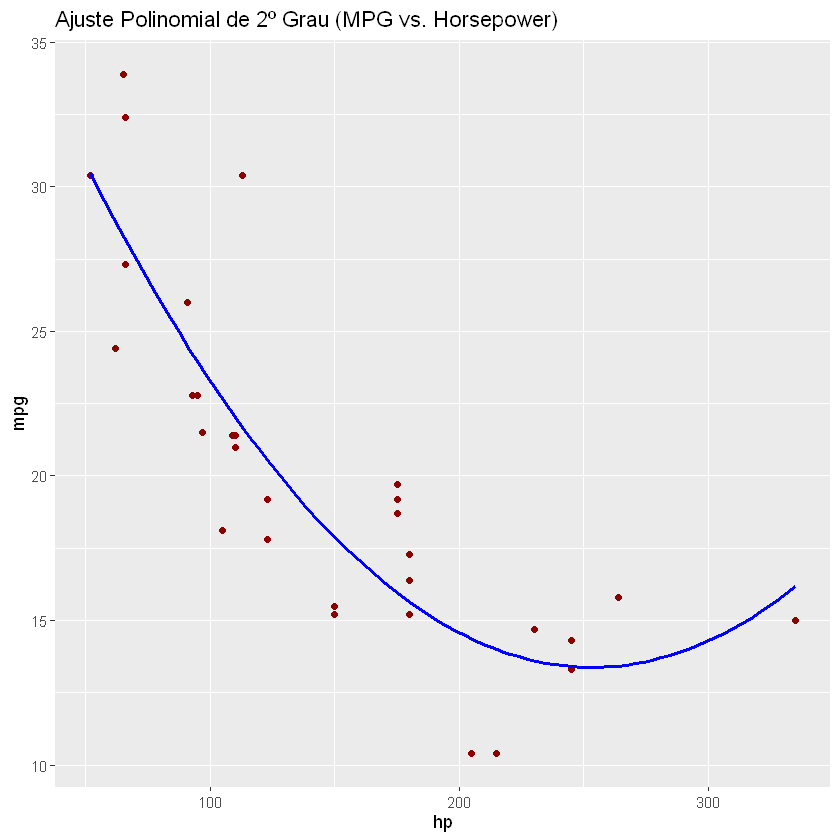

In [3]:
# Visualização do Ajuste Polinomial

mtcars %>%

ggplot(aes(x = hp, y = mpg)) +


geom_point(color = "darkred") +


geom_smooth(method = "lm", formula = y ~ x + I(x^2), se = FALSE, color = "blue") +


labs(title = "Ajuste Polinomial de 2º Grau (MPG vs. Horsepower)")

In [4]:
# Modelo Polinomial de 3º Grau (Cúbico)
# Usa poly() para simplificar a inclusão de termos de ordem 3

modelo_poly_3 <- lm(mpg ~ poly(hp, 3, raw = TRUE), data = mtcars)


summary(modelo_poly_3)




Call:
lm(formula = mpg ~ poly(hp, 3, raw = TRUE), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8605 -1.3972 -0.5736  1.6461  9.0738 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4.422e+01  5.961e+00   7.419 4.43e-08 ***
poly(hp, 3, raw = TRUE)1 -2.945e-01  1.178e-01  -2.500   0.0185 *  
poly(hp, 3, raw = TRUE)2  9.115e-04  6.863e-04   1.328   0.1949    
poly(hp, 3, raw = TRUE)3 -8.701e-07  1.204e-06  -0.722   0.4760    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.103 on 28 degrees of freedom
Multiple R-squared:  0.7606,	Adjusted R-squared:  0.7349 
F-statistic: 29.65 on 3 and 28 DF,  p-value: 7.769e-09
